In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
### define state
class State(TypedDict):
    num1:int
    num2:int
    ops1:str
    num3:int
    num4:int
    ops2:str
    final_1:int
    final_2:int

In [5]:
### define nodes actions
def adder_1(state:State) -> State:
    """add first 2 numbers"""
    state['final_1'] = state['num1'] + state['num2']
    return state

def subtractor_1(state:State) -> State:
    """subtract first 2 numbers"""
    state['final_1'] = state['num1'] - state['num2']
    return state

def router_1(state:State) -> State:
    """choose operation"""
    if state["ops1"] == "+":
        return "addition_operation_1"
    elif state["ops1"] == "-":
        return "subtractor_operation_1"

def adder_2(state:State) -> State:
    """add first 2 numbers"""
    state['final_2'] = state['num1'] + state['num2']
    return state

def subtractor_2(state:State) -> State:
    """subtract first 2 numbers"""
    state['final_2'] = state['num1'] - state['num2']
    return state

def router_2(state:State) -> State:
    """choose operation"""
    if state["ops2"] == "+":
        return "addition_operation_2"
    elif state["ops2"] == "-":
        return "subtractor_operation_2"


In [6]:
### define graph nodes
graph = StateGraph(State)
graph.add_node("router_1",lambda state:state)
graph.add_node("add_node_1",adder_1)
graph.add_node("subtract_node_1",subtractor_1)
graph.add_node("router_2",lambda state:state)
graph.add_node("add_node_2",adder_2)
graph.add_node("subtract_node_2",subtractor_2)

### define Edges

### first router logic
graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    router_1,
    {
        #Edge:node
        "addition_operation_1":"add_node_1",
        "subtractor_operation_1":"subtract_node_1"
    }
)
graph.add_edge("add_node_1","router_2")
graph.add_edge("subtract_node_1","router_2")

### second router Logic
graph.add_conditional_edges(
    "router_2",
    router_2,
    {
        #Edge:node
        "addition_operation_2":"add_node_2",
        "subtractor_operation_2":"subtract_node_2"
    }
)
graph.add_edge("add_node_2",END)
graph.add_edge("subtract_node_2",END)

### compile graph
app = graph.compile()

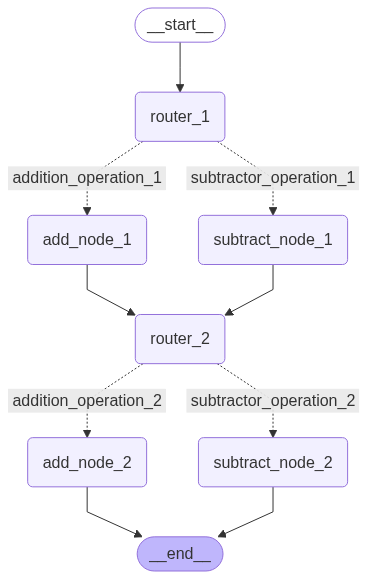

In [7]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
agentstate = State(num1=5,num2=10,ops1='-',num3=5,num4=10,ops2='+')
result = app.invoke(agentstate)
result['final_1'],result['final_2']

(-5, 15)